In [1]:
# 사용 가능한 GPU 확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# GPU 사용 설정
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12245631986275564384
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6290407424
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11233628951439033243
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), os.path.pardir, 'functions'))
from get_test_csv_fn import get_test_csv_fn

from datetime import datetime
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense

In [3]:
# ========= 코드 그대로 모델 생성하고 학습시켜보기 =========
# https://techblog-history-younghunjo1.tistory.com/261

TRAIN_FOLDER_PATH = '../../open/train/'
TEST_FOLDER_PATH = '../../open/test/'

EPOCHS = 10
RESIZED_WIDTH = 100
RESIZED_HEIGHT = 100

train_img_generator = ImageDataGenerator(rescale=1/255.)
train_img_flow = train_img_generator.flow_from_directory(
    TRAIN_FOLDER_PATH, target_size=(RESIZED_WIDTH, RESIZED_HEIGHT))

# 109
print(len(train_img_flow))

# for img in train_img_flow:
#     print('img :', img)

def create_model_fn():

    input_tensor = Input(shape=(RESIZED_WIDTH, RESIZED_HEIGHT, 3))

    pretrained_model = Xception(
        input_tensor=input_tensor, include_top=False, weights='imagenet')
    pretrained_output = pretrained_model.output

    x = GlobalAveragePooling2D()(pretrained_output)
    x = Dense(units=128, activation='relu')(x)
    output = Dense(units=19, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    return model

model = create_model_fn()
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['acc'])

train_history = model.fit(train_img_flow, epochs=EPOCHS)
loss = train_history.history['loss']
print('loss :', loss)

# 연월일_시간
now = datetime.today().strftime('%Y%m%d_%H%M%S')
model.save(f'model_{now}.h5')

# ========================================================


Found 3457 images belonging to 19 classes.
109
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 49, 49, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 49, 49, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                               

  0%|          | 0/792 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 1/792 [00:00<01:22,  9.55it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 792/792 [00:13<00:00, 58.89it/s]


normalized_test_image_tensor.shape : (792, 100, 100, 3)
25/25 [==============================] - 2s 38ms/step
predicted_y.shape : (792, 19)
predicted_labels : ['훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '오염', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', 

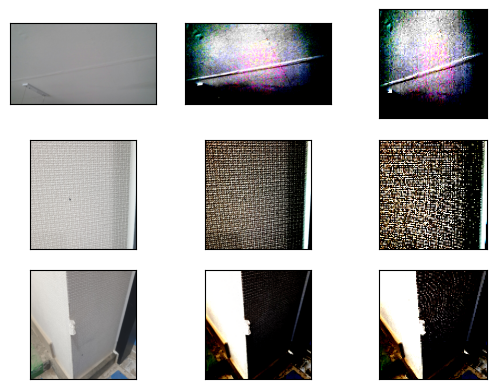

In [4]:
get_test_csv_fn(RESIZED_WIDTH, RESIZED_HEIGHT, model)

In [9]:
test_img_generator = ImageDataGenerator(rescale=1/255.)
test_img_flow = test_img_generator.flow_from_directory(
    "../../open/", classes=['test'], class_mode=None, shuffle=False, target_size=(RESIZED_WIDTH, RESIZED_HEIGHT), )

predicted_result = model.predict(test_img_flow)
# print('predicted_result :', predicted_result)

get_test_csv_fn(predicted_result)

Found 792 images belonging to 1 classes.
25/25 [==============================] - 7s 284ms/step
predicted_labels : ['훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '오염', '오염', '오타공', '몰딩수정', '오타공', '훼손', '훼손', '훼손', '오염', '훼손', '걸레받이수정', '훼손', '훼손', '오염', '훼손', '훼손', '오염', '훼손', '훼손', '오염', '면불량', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '곰팡이', '훼손', '훼손', '훼손', '오타공', '훼손', '훼손', '훼손', '터짐', '오염', '훼손', '면불량', '오염', '오염', '오염', '훼손', '오염', '훼손', '훼손', '녹오염', '훼손', '훼손', '훼손', '석고수정', '훼손', '면불량', '오타공', '몰딩수정', '훼손', '훼손', '훼손', '훼손', '오염', '오염', '훼손', '오염', '오염', '오염', '훼손', '면불량', '훼손', '터짐', '훼손', '오염', '걸레받이수정', '오염', '꼬임', '훼손', '오염', '오타공', '훼손', '터짐', '훼손', '녹오염', '오염', '훼손', '오염', '훼손', '훼손', '오염', '훼손', '오염', '훼손', '오타공', '훼손', '훼손', '오염', '훼손', '오염', '터짐', '훼손', '훼손', '가구수정', '훼손', '오염', '훼손', '터짐', '훼손', '훼손', '훼손', '훼손', '면불량', '훼손', '훼손', '터짐', '훼손', '훼손', '훼손', '훼손', '녹오염', '훼손', '훼손', '훼손', '훼손', '훼손', '오염', '훼손', '몰딩수정', '터짐', '훼손', '훼손', '훼손', '면불량', '훼손', '훼손', '훼손', '오타공', '오타